## 영구 포트폴리어

- 레벨 : 초급  
- 기대 연복리수익률 : 8% 정도  
- 포함 자산 : 4 개 ETF  
> 미국 주식 SPY, 미국 장기국채 TLT, 금 GLD, 미국 초단기채권 BIL  각 25%

- 매수 전략 : 4 개 ETF 에 자산을 4 등분  
- 매도 전략 : 연 1 회 리밸런싱  

In [1]:
import FinanceDataReader as fdr
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime, timedelta, date
import numpy as np
# pandas 표기 설정
pd.options.display.float_format = '{:.4f}'.format # 소수점 4자리까지 표기
# pd.set_option('display.max_rows', None) # Dataframe 출력시 컬럼 생략없이 전체 표기
pd.set_option('mode.chained_assignment',  None) # <==== 경고를 끈다

### 팩터 불러오기

In [2]:
# 기간 설정
# 2007년 6월 1일 부터 모든 팩터 데이터 존재
start_date = datetime(1970, 1, 2)
end_date = datetime(2022, 12, 31)

In [3]:
# 종목의 종가 수집 함수
def get_price_data(stocks, start_date, end_date):
    df_price = pd.DataFrame(columns=stocks)
    for s in stocks:
        df_price[s] = pdr.DataReader(s, 'yahoo', start_date, end_date)['Close']
    
    return df_price

In [4]:
# 종목 설정
stocks = ['SPY', 'TLT', 'GLD', 'BIL']

In [5]:
df = get_price_data(stocks, start_date, end_date)
df = df.dropna()
df

,SPY,TLT,GLD,BIL
Date,,,,
2007-05-30,153.4800,86.5400,64.7200,91.6000
2007-05-31,153.3200,86.3800,65.5400,91.6000
2007-06-01,154.0800,85.5900,66.4400,91.6200
2007-06-04,154.1000,85.9800,66.5400,91.6400
2007-06-05,153.4900,85.4400,66.3700,91.6400
...,...,...,...,...
2022-05-31,412.9300,116.5600,171.1400,91.4500
2022-06-01,409.5900,116.2200,172.2300,91.4200
2022-06-02,417.3900,116.2800,174.3500,91.4400


### 수익률, CAGR 및 MDD 구하기

In [6]:
# 초기자산에 대한 리밸런싱(1년) 수익 구하기

df['Profit'] = 10000 # 초기 자산
df['S_Profit'] = df['T_Profit'] = df['G_Profit'] = df['B_Profit'] = 10000 / 4
for i in range(1, len(df)):
    df['S_Profit'][i] = df['S_Profit'][i-1] * (df['SPY'][i] / df['SPY'][i-1])
    df['T_Profit'][i] = df['T_Profit'][i-1] * (df['TLT'][i] / df['TLT'][i-1])
    df['G_Profit'][i] = df['G_Profit'][i-1] * (df['GLD'][i] / df['GLD'][i-1])
    df['B_Profit'][i] = df['B_Profit'][i-1] * (df['BIL'][i] / df['BIL'][i-1])
    df['Profit'][i] = df['S_Profit'][i] + df['T_Profit'][i] + df['G_Profit'][i] + df['B_Profit'][i]
    
    if str(df.index[i].year) != str(df.index[i-1].year): # 1년 주기 리밸런싱
        div = df['Profit'][i] / 4
        df['S_Profit'][i] = df['T_Profit'][i] = df['G_Profit'][i] = df['B_Profit'][i] = div
        
df

,SPY,TLT,GLD,BIL,Profit,S_Profit,T_Profit,G_Profit,B_Profit
Date,,,,,,,,,
2007-05-30,153.4800,86.5400,64.7200,91.6000,10000,2500.0000,2500.0000,2500.0000,2500.0000
2007-05-31,153.3200,86.3800,65.5400,91.6000,10024,2497.3940,2495.3778,2531.6749,2500.0000
2007-06-01,154.0800,85.5900,66.4400,91.6200,10049,2509.7734,2472.5559,2566.4401,2500.5460
2007-06-04,154.1000,85.9800,66.5400,91.6400,10065,2510.0992,2483.8226,2570.3028,2501.0917
2007-06-05,153.4900,85.4400,66.3700,91.6400,10033,2500.1630,2468.2228,2563.7362,2501.0917
...,...,...,...,...,...,...,...,...,...
2022-05-31,412.9300,116.5600,171.1400,91.4500,19767,4631.6430,4328.1885,5447.6973,5360.0083
2022-06-01,409.5900,116.2200,172.2300,91.4200,19750,4594.1798,4315.5635,5482.3939,5358.2500
2022-06-02,417.3900,116.2800,174.3500,91.4400,19908,4681.6690,4317.7913,5549.8777,5359.4225


In [7]:
df['Profit_P'] = df['Profit'].pct_change() # 수익률
df['Profit_PA'] = (1+df['Profit_P']).cumprod()-1 # 누적 수익률
df['Profit_LP'] = np.log(df['Profit_P']+1) # log 수익률
df['Profit_LPA'] = df['Profit_LP'].cumsum() # log 수익률

df[['Profit_P', 'Profit_PA', 'Profit_LP', 'Profit_LPA']] *= 100
df

,SPY,TLT,GLD,BIL,Profit,S_Profit,T_Profit,G_Profit,B_Profit,Profit_P,Profit_PA,Profit_LP,Profit_LPA
Date,,,,,,,,,,,,,
2007-05-30,153.4800,86.5400,64.7200,91.6000,10000,2500.0000,2500.0000,2500.0000,2500.0000,NaN,NaN,NaN,NaN
2007-05-31,153.3200,86.3800,65.5400,91.6000,10024,2497.3940,2495.3778,2531.6749,2500.0000,0.2400,0.2400,0.2397,0.2397
2007-06-01,154.0800,85.5900,66.4400,91.6200,10049,2509.7734,2472.5559,2566.4401,2500.5460,0.2494,0.4900,0.2491,0.4888
2007-06-04,154.1000,85.9800,66.5400,91.6400,10065,2510.0992,2483.8226,2570.3028,2501.0917,0.1592,0.6500,0.1591,0.6479
2007-06-05,153.4900,85.4400,66.3700,91.6400,10033,2500.1630,2468.2228,2563.7362,2501.0917,-0.3179,0.3300,-0.3184,0.3295
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31,412.9300,116.5600,171.1400,91.4500,19767,4631.6430,4328.1885,5447.6973,5360.0083,-0.8775,97.6700,-0.8814,68.1429
2022-06-01,409.5900,116.2200,172.2300,91.4200,19750,4594.1798,4315.5635,5482.3939,5358.2500,-0.0860,97.5000,-0.0860,68.0568
2022-06-02,417.3900,116.2800,174.3500,91.4400,19908,4681.6690,4317.7913,5549.8777,5359.4225,0.8000,99.0800,0.7968,68.8537


In [8]:
# 복리수익률 계산 함수
def CAGR(first, last, periods):
    return ((last/first)**(1/periods)-1) * 100

In [9]:
df['CAGR'] = np.nan

fprice = df['Profit'][0]
df['CAGR'][0] = 0
idx = 0
years = 1
for row in range(1, len(df)):
    if str(df.index[row].year) != str(df.index[row-1].year):
        df['CAGR'][row] = CAGR(fprice, df['Profit'][row], years)
        idx = i
        years += 1
    else:
        df['CAGR'][row] = df['CAGR'][row-1]
df

,SPY,TLT,GLD,BIL,Profit,S_Profit,T_Profit,G_Profit,B_Profit,Profit_P,Profit_PA,Profit_LP,Profit_LPA,CAGR
Date,,,,,,,,,,,,,,
2007-05-30,153.4800,86.5400,64.7200,91.6000,10000,2500.0000,2500.0000,2500.0000,2500.0000,NaN,NaN,NaN,NaN,0.0000
2007-05-31,153.3200,86.3800,65.5400,91.6000,10024,2497.3940,2495.3778,2531.6749,2500.0000,0.2400,0.2400,0.2397,0.2397,0.0000
2007-06-01,154.0800,85.5900,66.4400,91.6200,10049,2509.7734,2472.5559,2566.4401,2500.5460,0.2494,0.4900,0.2491,0.4888,0.0000
2007-06-04,154.1000,85.9800,66.5400,91.6400,10065,2510.0992,2483.8226,2570.3028,2501.0917,0.1592,0.6500,0.1591,0.6479,0.0000
2007-06-05,153.4900,85.4400,66.3700,91.6400,10033,2500.1630,2468.2228,2563.7362,2501.0917,-0.3179,0.3300,-0.3184,0.3295,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31,412.9300,116.5600,171.1400,91.4500,19767,4631.6430,4328.1885,5447.6973,5360.0083,-0.8775,97.6700,-0.8814,68.1429,5.2137
2022-06-01,409.5900,116.2200,172.2300,91.4200,19750,4594.1798,4315.5635,5482.3939,5358.2500,-0.0860,97.5000,-0.0860,68.0568,5.2137
2022-06-02,417.3900,116.2800,174.3500,91.4400,19908,4681.6690,4317.7913,5549.8777,5359.4225,0.8000,99.0800,0.7968,68.8537,5.2137


In [10]:
# MDD 계산
window = 252
Roll_Max = df['Profit'].rolling(window, min_periods=1).max()
Daily_Drawdown = df['Profit']/ Roll_Max -1.0
Max_Daily_Drawdown = Daily_Drawdown.rolling(window, min_periods=1).min()
df['MDD'] = Max_Daily_Drawdown * 100

In [11]:
df = df[['SPY', 'TLT', 'GLD', 'BIL', 'Profit', 'Profit_P', 'Profit_PA', 'Profit_LP', 'Profit_LPA', 'CAGR', 'MDD']]
print(f"포트폴리오 최대 MDD: {df['MDD'].min():.2f}%")
df

포트폴리오 최대 MDD: -15.72%


,SPY,TLT,GLD,BIL,Profit,Profit_P,Profit_PA,Profit_LP,Profit_LPA,CAGR,MDD
Date,,,,,,,,,,,
2007-05-30,153.4800,86.5400,64.7200,91.6000,10000,NaN,NaN,NaN,NaN,0.0000,0.0000
2007-05-31,153.3200,86.3800,65.5400,91.6000,10024,0.2400,0.2400,0.2397,0.2397,0.0000,0.0000
2007-06-01,154.0800,85.5900,66.4400,91.6200,10049,0.2494,0.4900,0.2491,0.4888,0.0000,0.0000
2007-06-04,154.1000,85.9800,66.5400,91.6400,10065,0.1592,0.6500,0.1591,0.6479,0.0000,0.0000
2007-06-05,153.4900,85.4400,66.3700,91.6400,10033,-0.3179,0.3300,-0.3184,0.3295,0.0000,-0.3179
...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31,412.9300,116.5600,171.1400,91.4500,19767,-0.8775,97.6700,-0.8814,68.1429,5.2137,-9.8112
2022-06-01,409.5900,116.2200,172.2300,91.4200,19750,-0.0860,97.5000,-0.0860,68.0568,5.2137,-9.8112
2022-06-02,417.3900,116.2800,174.3500,91.4400,19908,0.8000,99.0800,0.7968,68.8537,5.2137,-9.8112


### 데이터 시각화

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Date'>

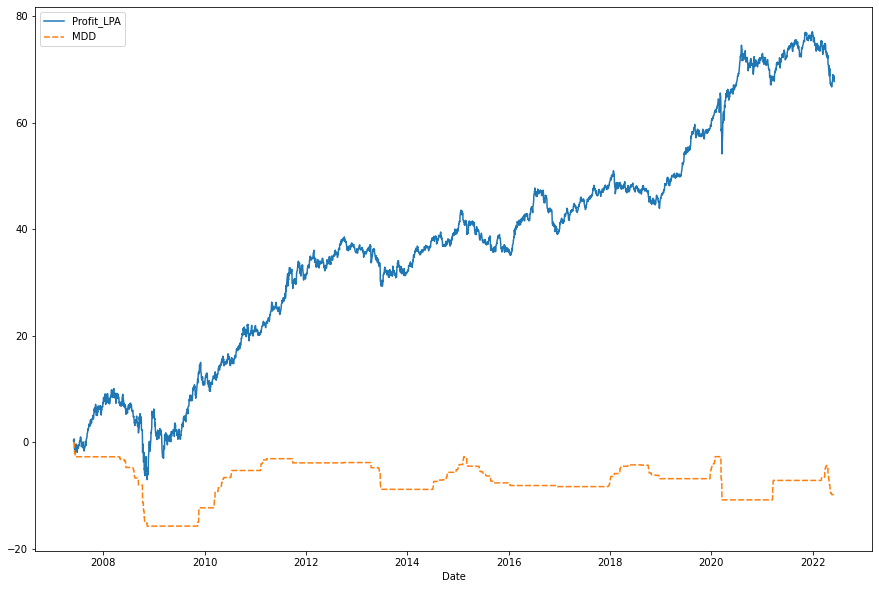

In [13]:
plt.figure(figsize=(15, 10))

sns.lineplot(data=df[['Profit_LPA', 'MDD']])